In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

# Load data
df = pd.read_csv("netflix_titles.csv")

# Set style
sns.set(style="darkgrid")
plt.rcParams["figure.figsize"] = (10, 6)

# Clean data
df['date_added'] = pd.to_datetime(df['date_added'], format='mixed')
df['year_added'] = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month

<ipython-input-4-fbca56880f2c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', palette='Set2')


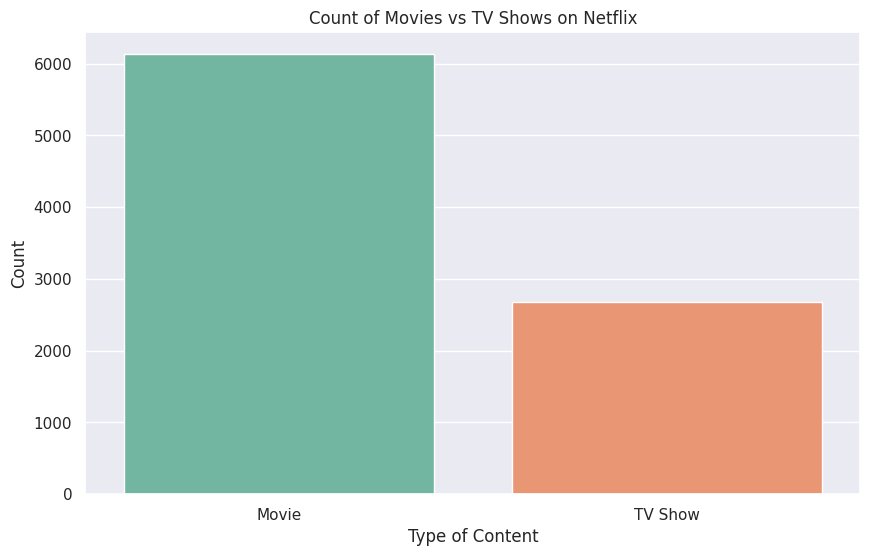

In [4]:

# --- 1. Movies vs TV Shows ---
plt.figure()
sns.countplot(data=df, x='type', palette='Set2')
plt.title("Count of Movies vs TV Shows on Netflix")
plt.xlabel("Type of Content")
plt.ylabel("Count")
plt.show()


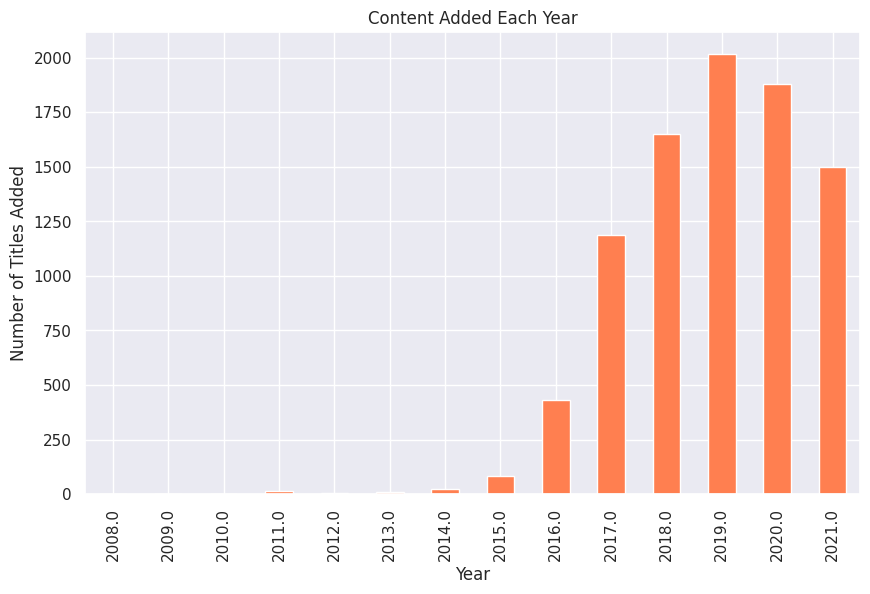

In [5]:

# --- 2. Content added each year ---
plt.figure()
df['year_added'].value_counts().sort_index().plot(kind='bar', color='coral')
plt.title("Content Added Each Year")
plt.xlabel("Year")
plt.ylabel("Number of Titles Added")
plt.show()


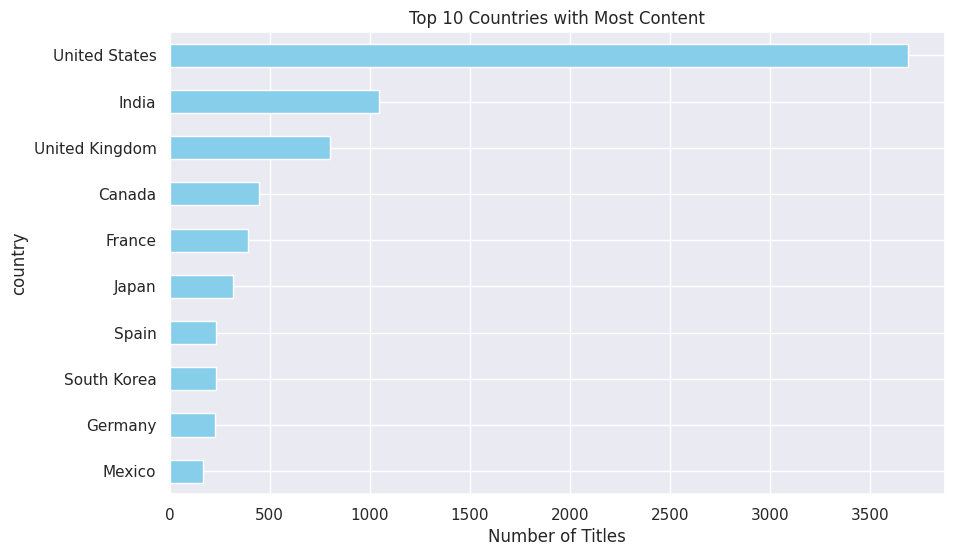

In [6]:

# --- 3. Top 10 countries with most content ---
top_countries = df['country'].dropna().str.split(', ').explode().value_counts().head(10)
plt.figure()
top_countries.plot(kind='barh', color='skyblue')
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Number of Titles")
plt.gca().invert_yaxis()
plt.show()


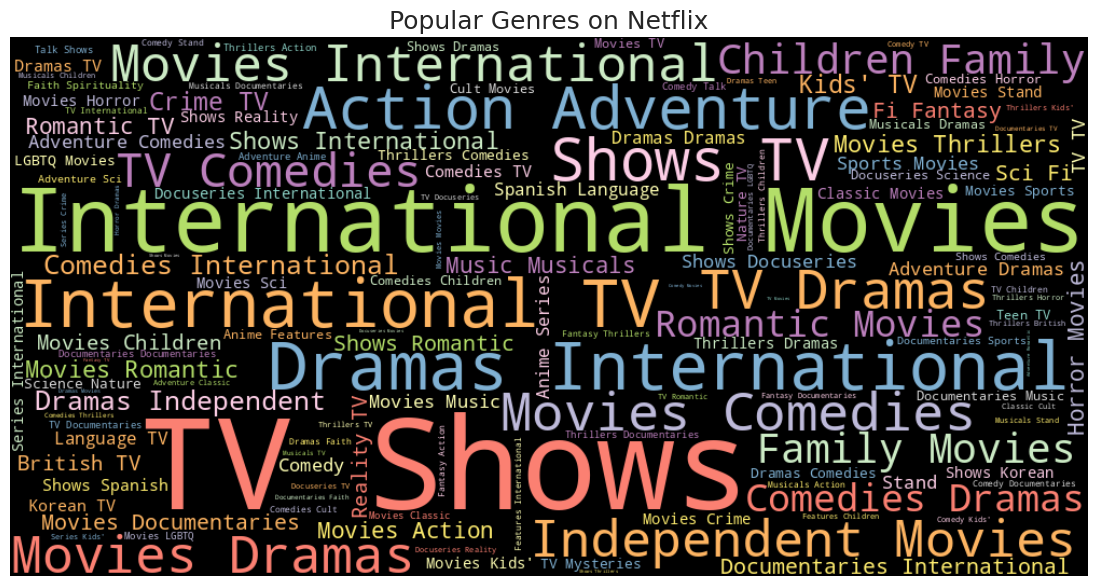

In [7]:

# --- 4. Word Cloud of Genres ---
text = ' '.join(df['listed_in'].dropna())
wordcloud = WordCloud(width=1000, height=500, background_color='black', colormap='Set3').generate(text)
plt.figure(figsize=(15, 7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Popular Genres on Netflix", fontsize=18)
plt.show()


<ipython-input-8-991a13fba400>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10], palette='magma')


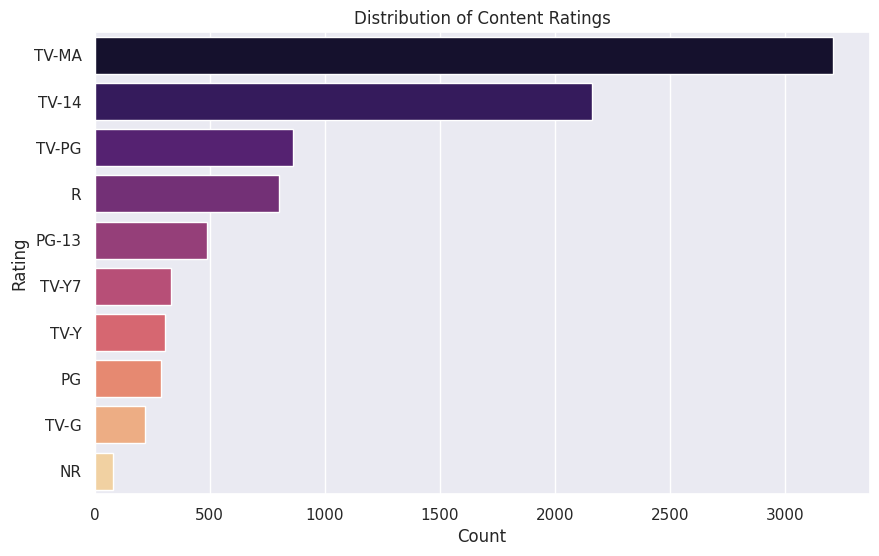

In [8]:

# --- 5. Content Ratings Distribution ---
plt.figure()
sns.countplot(data=df, y='rating', order=df['rating'].value_counts().index[:10], palette='magma')
plt.title("Distribution of Content Ratings")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

